In [70]:
from sklearn import datasets
import numpy as np

In [71]:
iris_dataset = datasets.load_iris()
X = iris_dataset.data[:, [2,3]]
y = iris_dataset.target

In [72]:
print('Class Labels: ', np.unique(y))

Class Labels:  [0 1 2]


In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.3, random_state=1, stratify=y)

 We took advantage of the built-in support for stratification via stratify=y. In this context, stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset. We can use NumPy’s bincount function, which counts the number of occurrences of each value in an array, to verify that this is indeed the case:

In [75]:

print("Labels count in y: ", np.bincount(y))
print("Labels count in y_train: ", np.bincount(Y_train))
print("Labels count in y_test: ", np.bincount(Y_test))

Labels count in y:  [50 50 50]
Labels count in y_train:  [35 35 35]
Labels count in y_test:  [15 15 15]


In [77]:
# standardize the inputs
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  # initiates the object
sc.fit(X_train)  # find mu and sigma
X_train_std = sc.transform(X_train) 
X_test_std = sc.transform(X_test)

# Note that we used the same scaling parameters to standardize the test dataset 
# so that both the values in the training and test dataset are comparable with one another.





### Perceptron API

Having standardized the training data, we can now train a perceptron model. Most algorithms in scikit-learn already support multiclass classification by default via the one-versus-rest (OvR) method, which allows us to feed the three flower classes to the perceptron all at once.

In [9]:
from sklearn.linear_model import Perceptron

In [10]:
pp = Perceptron(eta0=0.1, random_state=1)  # eta0 is same as lr which we implemented

In [11]:
pp.fit(X_train_std, Y_train)

Perceptron(eta0=0.1, random_state=1)

In [13]:
# predict on test dataset
y_pred = pp.predict(X_test_std)
print("Misclassified Examples are %d" % (Y_test != y_pred).sum() )

Misclassified Examples are 1


In [82]:
# get the classification accuracy
from sklearn.metrics import accuracy_score
print('Accuracy method 1: %.3f' % accuracy_score(Y_test, y_pred))
print("Accuracy method 2: %.3f" % pp.score(X_test_std, Y_test))

Accuracy method 1: 0.978
Accuracy method 2: 0.978


In [20]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,
resolution=0.02): # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                        np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')
    # highlight test examples
    if test_idx:
    # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='Test set')

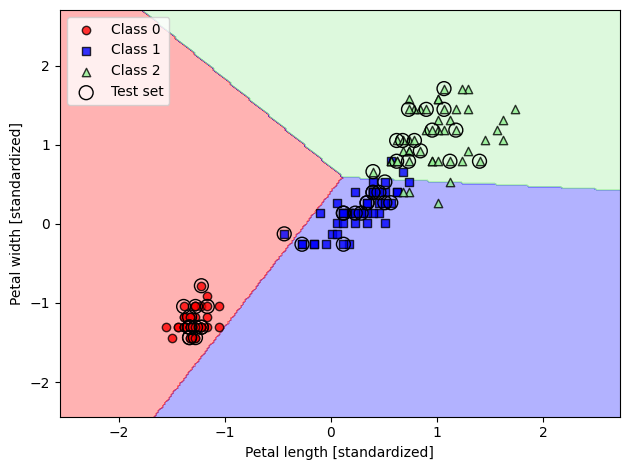

In [21]:
X_combined_std = np.vstack((X_train_std, X_test_std)) 
y_combined = np.hstack((Y_train, Y_test))
plot_decision_regions(X=X_combined_std, y=y_combined,classifier=pp, test_idx=range(105, 150)) 
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

The perceptron algorithm never converges on datasets that aren’t perfectly linearly separable, which is why the use of the perceptron algorithm is typically not recommended in practice.

In [22]:
# using Logistic regression
from sklearn.linear_model import LogisticRegression

Note that there exist many different algorithms for solving optimization problems. For minimizing convex loss functions, such as the logistic regression loss, it is recommended to use more advanced approaches than regular stochastic gradient descent (SGD). In fact, scikit-learn implements a whole range of such optimization algorithms, which can be specified via the solver parameter, namely, 'newton-cg', 'lbfgs', 'liblinear', 'sag', and 'saga'.

In [85]:


lg = LogisticRegression(C=100, solver='lbfgs', random_state=1, multi_class='ovr')   # C is inverse of regularization lambda
lg.fit(X_train_std, Y_train)

LogisticRegression(C=100, multi_class='multinomial', random_state=1)

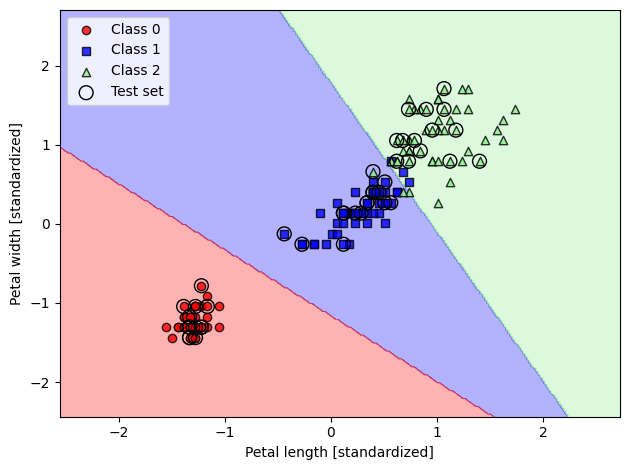

In [86]:
plot_decision_regions(X_combined_std, y_combined, classifier=lg, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [25]:
print("Number of examples misclassified: %d"%(lg.predict(X_test_std)!= Y_test).sum())

Number of examples misclassified: 1


In [30]:
print("Accuracy is:", lg.score(X_test_std, Y_test)*100, "%")


Accuracy is: 97.77777777777777 %


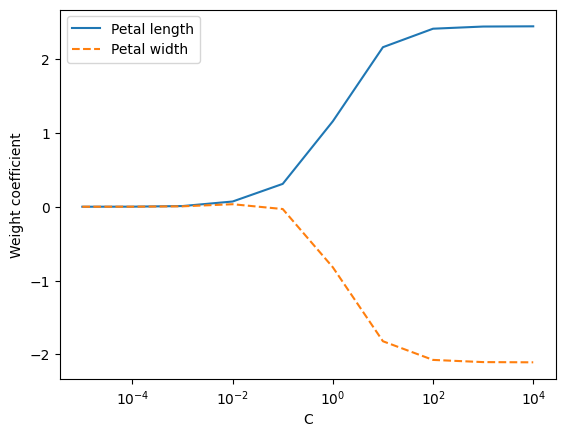

In [88]:
#to understand the effect of C which is inversely proportional to lambda
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c,
    multi_class='ovr')
    lr.fit(X_train_std, Y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0],
label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

# SVM (Support Vector Machines)
in SVMs, our optimization objective is to maximize the margin. The margin is defined as the distance between the separating hyperplane (decision boundary) and the training examples that are closest to this hyperplane, which are the so-called support vectors.

In [31]:
from sklearn.svm import SVC

In [89]:
svm = SVC(kernel="linear" , C = 1, random_state=1)

In [90]:
svm.fit(X_train_std, Y_train)

SVC(C=1, kernel='linear', random_state=1)

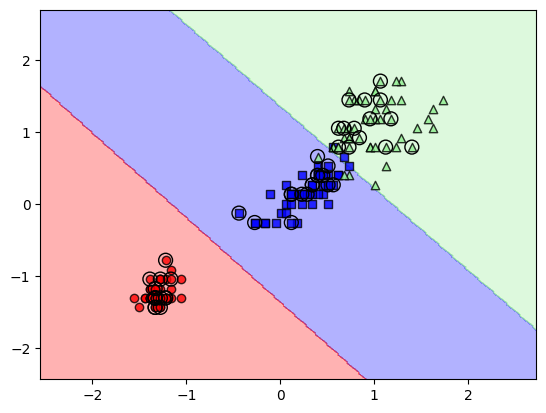

In [91]:
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))

## Alternate implementation of all the above guys by scikit

In [92]:
from sklearn.linear_model import SGDClassifier 

In [93]:
perceptron = SGDClassifier(loss="perceptron")
svmLinear = SGDClassifier(loss="hinge")  #svm
lg1 = SGDClassifier(loss="log")

## Non Linear SVM's

In [105]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:,1] > 0)
y_xor = np.where(y_xor==True, 1, 0)


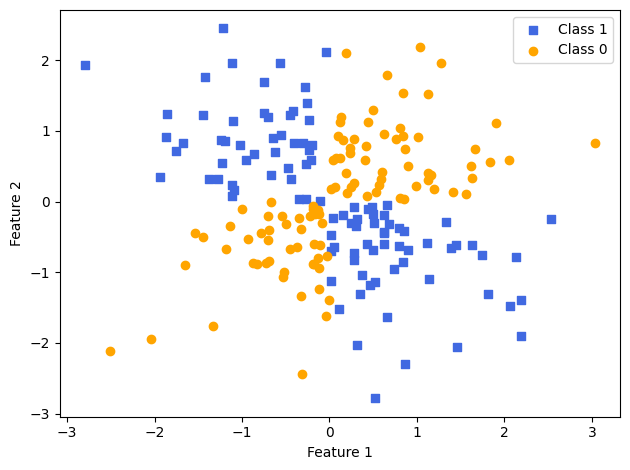

In [115]:
plt.scatter(X_xor[y_xor==1,0], X_xor[y_xor==1, 1], c="royalblue", marker="s", label="Class 1")
plt.scatter(X_xor[y_xor==0,0], X_xor[y_xor==0, 1], c="orange", marker="o", label="Class 0")
plt.xlabel('Feature 1') 
plt.ylabel('Feature 2') 
plt.legend(loc='best') 
plt.tight_layout()
plt.show()


These examples can't be seperated linearly

The basic idea behind kernel methods for dealing with such linearly inseparable data is to create nonlinear combinations of the original features to project them onto a higher-dimensional space via a mapping function, where the data becomes linearly separable. example we can transform a two-dimensional dataset into a new three-dimensional feature space.


In [117]:
svm  =  SVC(kernel="rbf", C=10.0, random_state=1, gamma=0.10)
svm.fit(X_xor, y_xor)

SVC(C=10.0, gamma=0.1, random_state=1)

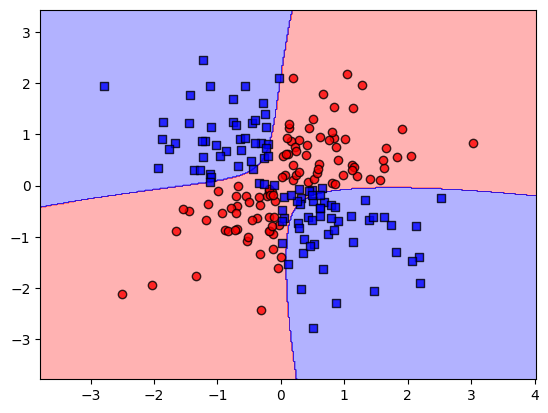

In [118]:
plot_decision_regions(X_xor, y_xor, classifier=svm)

The 𝛾 parameter, which we set to gamma=0.1, can be understood as a cut-off parameter for the Gaussian sphere. If we increase the value for 𝛾, we increase the influence or reach of the training examples, which leads to a tighter and bumpier decision boundaries

In [119]:
#fit on flower dataset
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)  # here gamma is small
svm.fit(X_train_std, Y_train)

SVC(gamma=0.2, random_state=1)

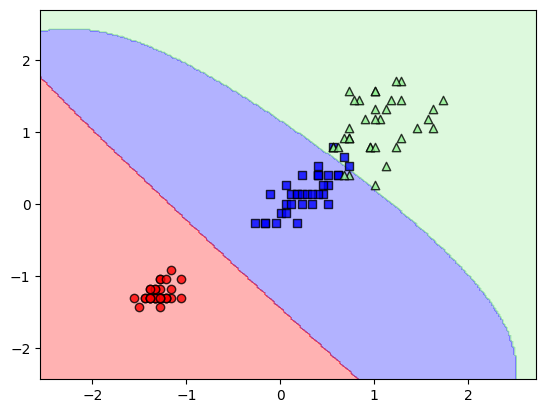

In [121]:
plot_decision_regions(X_train_std, Y_train, classifier=svm)  ## smooth boundary

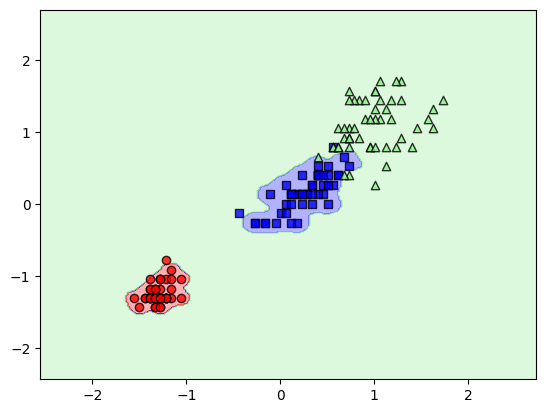

In [123]:
#fit on flower dataset
svm = SVC(kernel='rbf', random_state=1, gamma=100, C=1.0)  # here gamma is large
svm.fit(X_train_std, Y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm)  ## smooth boundary

Although the model fits the training dataset very well, such a classifier will likely have a high generalization error on unseen data. This illustrates that the 𝛾 parameter also plays an important role in controlling overfitting or variance when the algorithm is too sensitive to fluctuations in the training dataset